<IPython.core.display.Javascript object>


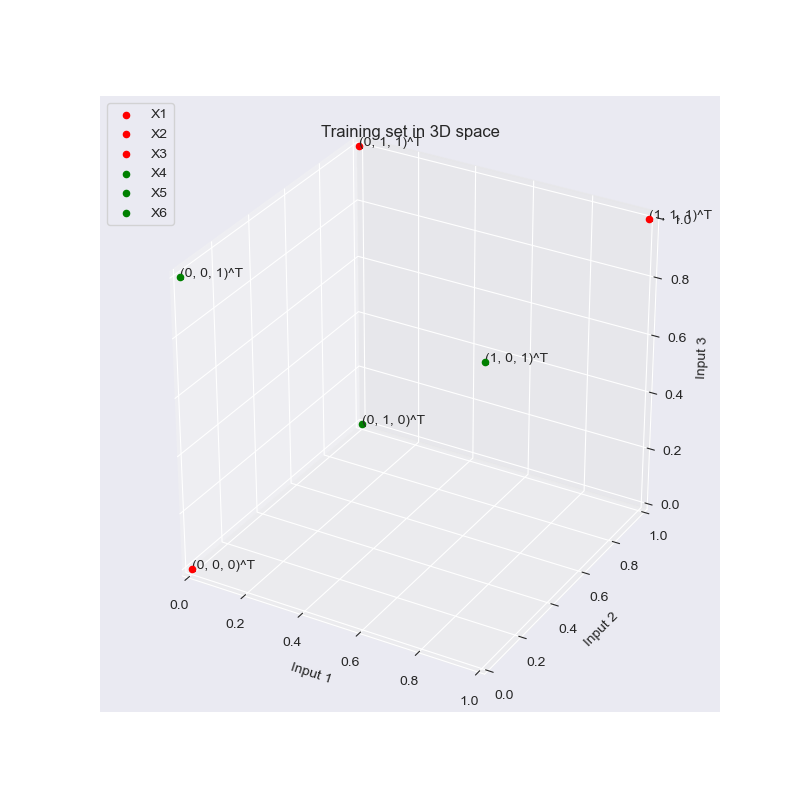

In [80]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# To enable interactivity you need to use the notebook backend of matplotlib
%matplotlib notebook 

# Create figure and axes
fig = plt.figure(figsize=(8,8)) # creating a figure of size 13 inches X 8 inches.
ax = fig.add_subplot(111, projection='3d')
labels = ["Red", "Green"]
x1min, x1max = 0,  1
x2min, x2max = 0,  1
X1 = np.arange(x1min, x1max, 0.05)
X2 = np.arange(x2min, x2min, 0.05)
xs = (0, 0, 1, 1, 0, 0)
ys = (0, 1, 1, 0, 0, 1)
zs = (0, 1, 1, 1, 1, 0)

# Plot the point
# ax.scatter(2,3,4) # plot the point (2,3,4) on the figure
ax.scatter(0, 0, 0, color="r", label=labels[0])
ax.scatter(0, 1, 1, color="r", label=labels[0])
ax.scatter(1, 1, 1, color="r", label=labels[0])
ax.scatter(1, 0, 1, color="g", label=labels[1])
ax.scatter(0, 0, 1, color="g", label=labels[1])
ax.scatter(0, 1, 0, color="g", label=labels[1])
for x, y, z in zip(xs, ys, zs):
    label = '(%d, %d, %d)^T' % (x, y, z)
    ax.text(x, y, z, label)
ax.set_xlim([x1min, x1max])
ax.set_ylim([x2min, x2max])  
ax.set_zlim(0,1)

# Adding a title
ax.set_title("Training set in 3D space")

# Adding axes label
ax.set_xlabel("Input 1")
ax.set_ylabel("Input 2")
ax.set_zlabel("Input 3")

# put legend
ax.legend(["X1","X2","X3", "X4", "X5", "X6"], loc="best")

plt.show()

In [1]:
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [45]:
class MLP:
    """
    Create a multi-layer perceptron.

    train_data: A 5x2 matrix with the input data.

    target: A 5x1 matrix with expected outputs

    lr: the learning rate. Defaults to 0.1

    num_epochs: the number of times the training data goes through the model
        while training

    inputLayerNeurons: the number of nodes in the input layer of the MLP.
        Should be equal to the second dimension of train_data.
    
    hiddenLayerNeurons: the number of nodes in the hidden layer of the MLP.

    outputLayerNeurons: the number of nodes in the output layer of the MLP.
        Should be equal to the second dimension of target.
    """
    def __init__(self, train_data, target, lr=0.1, num_epochs=100, inputLayerNeurons=2, hiddenLayerNeurons=2, outputLayerNeurons=1):
        self.train_data = train_data
        self.target = target
        self.lr = lr
        self.num_epochs = num_epochs

        # initialize both sets of weights and biases randomly
            # - hidden_weights: weights between input and hidden layer
            # - output_weights: weights between hidden and output layer
        self.hidden_weights = np.random.uniform(size=(inputLayerNeurons,  hiddenLayerNeurons))
        self.output_weights = np.random.uniform(size=( hiddenLayerNeurons, outputLayerNeurons))

        # - hidden_bias: biases for the  hidden layer
        # - output_bias: bias for the output layer
        self.hidden_bias = np.random.uniform(size=(1,hiddenLayerNeurons))
        self.output_bias = np.random.uniform(size=(1,outputLayerNeurons))
        
        print("Initial hidden weights: ",end='')
        print(*self.hidden_weights)
        print("Initial hidden biases: ",end='')
        print(*self.hidden_bias)
        print("Initial output weights: ",end='')
        print(*self.output_weights)
        print("Initial output biases: ",end='')
        print(*self.output_bias)

        self.losses = []

    def update_weights(self):
        
        # Calculate the squared error
        loss = 0.5 * (self.target - self.predicted_output) ** 2
        self.losses.append(np.sum(loss))

        error_term = (self.target - self.predicted_output)

        # the gradient for the hidden layer weights
        hidden_grad = self.train_data.T @ (((error_term * self.sigmoid_derivative(self.predicted_output)) * self.output_weights.T) * self.sigmoid_derivative(self.hidden_layer_output))

        # the gradient for the output layer weights
        output_grad = self.hidden_layer_output.T @ (error_term * self.sigmoid_derivative(self.predicted_output))

        # updating the weights by the learning rate times their gradient
        self.hidden_weights += self.lr * hidden_grad
        self.output_weights += self.lr * output_grad

        # update the biases the same way
        self.hidden_bias += np.sum(self.lr * ((error_term * self.sigmoid_derivative(self.predicted_output)) * self.output_weights.T) * self.sigmoid_derivative(self.hidden_layer_output), axis=0)
        self.output_bias += np.sum(self.lr * error_term * self.sigmoid_derivative(self.predicted_output), axis=0)

    def _sigmoid(self, x):
        """
        The sigmoid activation function.
        """
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        """
        The first derivative of the sigmoid function wrt x
        """
        return x * (1 - x)

    def forward(self, batch):
        """
        A single forward pass through the network.
        Implementation of wX + b
        """
        # Z1 = linear_function(W1, X, b1)
        self.hidden_layer_activation = np.dot(batch, self.hidden_weights) + self.hidden_bias
        # S1 = sigmoid_function(Z1)
        self.hidden_layer_output = self._sigmoid(self.hidden_layer_activation)
        # Z2 = linear_function(W2, S1, b2)
        self.output_layer_activation = np.dot(self.hidden_layer_output, self.output_weights) + self.output_bias
        # S2 = sigmoid_function(Z2)
        self.predicted_output = self._sigmoid(self.output_layer_activation)

        return self.predicted_output

    def classify(self, datapoint): # np.where(S2 >= 0.5, 1, 0)
        """
        Return the class to which a datapoint belongs based on
        the perceptron's output for that point.
        """
        datapoint = np.transpose(datapoint)
        if self.forward(datapoint) >= 0.5:
            return 1

        return 0

    def plot(self, h=0.01):
        """
        Generate plot of input data and decision boundary.
        """
        # setting plot properties like size, theme and axis limits
        sns.set_style('darkgrid')
        plt.figure(figsize=(10, 10))

        plt.axis('scaled')
        plt.xlim(-0.1, 1.1)
        plt.ylim(-0.1, 1.1)

        colors = {
            0: "ro",
            1: "go"
        }

        # plotting the five datapoints
        for i in range(len(self.train_data)):
            plt.plot([self.train_data[i][0]],
                     [self.train_data[i][1]],
                     colors[self.target[i][0]],
                     markersize=10)

        x_range = np.arange(-0.1, 1.1, h)
        y_range = np.arange(-0.1, 1.1, h)

        # creating a mesh to plot decision boundary
        xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
        Z = np.array([[self.classify([x, y]) for x in x_range] for y in y_range])

        # using the contourf function to create the plot
        plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)

    def train(self):
        """
        Train an MLP. Runs through the data num_epochs number of times.
        A forward pass is done first, followed by a backward pass (backpropagation)
        where the networks parameter's are updated.
        """
        for epoch in range(self.num_epochs):

            self.forward(self.train_data)
            self.update_weights()
            
            if epoch % 10000 == 0:
                print("Loss: ", self.losses[epoch])
        print("\nOutput from neural network after 10,000 epochs: ",end='')
        print(*self.predicted_output)

In [46]:
train_data = np.array(
    [
        [0, 0],
        [0, 1],
        [0.5, 0.5],
        [1, 0],
        [1, 1]])

expected_output = np.array(
    [
        [0],
        [0],
        [1],
        [0],
        [0]])

num_epochs =  100000
lr = 0.1
mlp = MLP(train_data, expected_output, lr, num_epochs)
mlp.train()

Initial hidden weights: [0.9544814  0.26877947] [0.18968597 0.56831652]
Initial hidden biases: [0.15344962 0.27936662]
Initial output weights: [0.79984555] [0.56754542]
Initial output biases: [0.1270259]
Loss:  1.1225694764769725
Loss:  0.3964289667006964
Loss:  0.01047992476425603
Loss:  0.0024633885333184744
Loss:  0.0013389455601040246
Loss:  0.0009088030585789292
Loss:  0.0006842827307339747
Loss:  0.0005471508074194013
Loss:  0.00045499160222069803
Loss:  0.000388932451407972

Output from neural network after 10,000 epochs: [0.01057026] [0.00966626] [0.98235713] [0.00799255] [0.00991718]


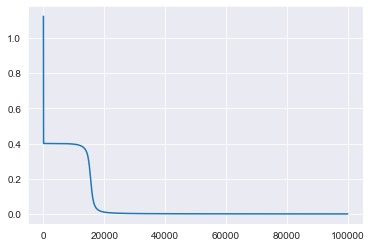

In [47]:
# plot loss curve
_ = plt.plot(mlp.losses)

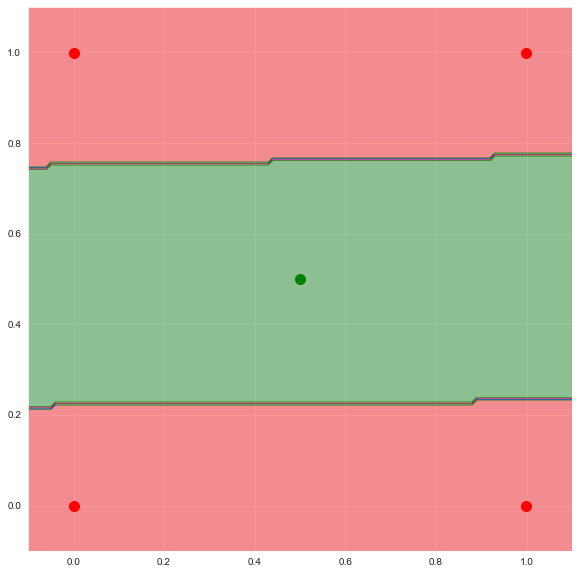

In [48]:
mlp.plot()

In [49]:
train_data = np.array(
    [
        [0, 0],
        [0, 1],
        [0.5, 0.5],
        [1, 0],
        [1, 1]])

target = np.array(
    [
        [0],
        [0],
        [1],
        [0],
        [0]])


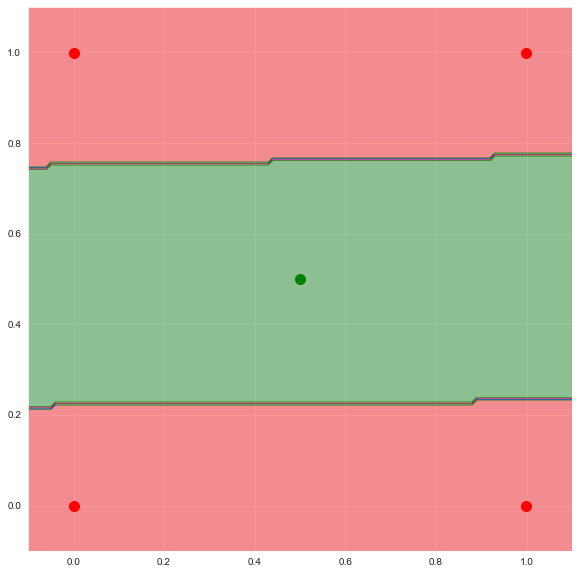

In [52]:
## diagnose
sns.set_style('darkgrid')
plt.figure(figsize=(10, 10))

plt.axis('scaled')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

h= 0.01 # interval

colors = {
    0: "ro",
    1: "go"
}

# plotting the five datapoints
for i in range(len(train_data)):
    plt.plot([train_data[i][0]],
             [train_data[i][1]],
             colors[target[i][0]],
             markersize=10)

    # plot the contour
x_range = np.arange(-0.1, 1.1, h)
y_range = np.arange(-0.1, 1.1, h)

# creating a mesh to plot decision boundary
xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
Z = np.array([[mlp.classify([x, y]) for x in x_range] for y in y_range])

# using the contourf function to create the plot
plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)

In [53]:
x_range = np.arange(-0.1, 1.1, h)
x_range.shape

(121,)

In [14]:
# xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
xx.shape

(200, 200)

In [15]:
#  xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
yy.shape

(200, 200)

In [27]:
# Z = np.array([[mlp.classify([x, y]) for x in x_range] for y in y_range])
Z.shape

(200, 200)

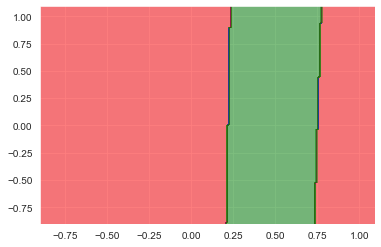

In [44]:
# using the contourf function to create the plot
# blue is for blue line

plt.contourf(xx, yy, Z, colors=['red','green','green', 'blue'], alpha=0.5)

In [54]:
train_data = np.array(
    [
        [0, 0],
        [0, 0.5],
        [0, 1],
        [0.5, 0],
        [0.5, 0.5],
        [0.5, 1],
        [1, 0],
        [1, 0.5],
        [1, 1]])

expected_output = np.array(
    [
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0]])
num_epochs =  100000
lr = 0.1
mlp = MLP(train_data, expected_output, lr, num_epochs)
mlp.train()

Initial hidden weights: [0.18894255 0.75879373] [0.53767046 0.94476251]
Initial hidden biases: [0.3309063  0.67222269]
Initial output weights: [0.52664185] [0.01570228]
Initial output biases: [0.72935903]
Loss:  2.2740376501622386
Loss:  0.44449811375895826
Loss:  0.4444468104212538
Loss:  0.4444450822107549
Loss:  0.4444447046520062
Loss:  0.44444455415075546
Loss:  0.44444449115549656
Loss:  0.4444444644443276
Loss:  0.4444444530369001
Loss:  0.44444444814389183

Output from neural network after 10,000 epochs: [0.11111577] [0.1111089] [0.11110203] [0.111118] [0.11111112] [0.11110425] [0.11112022] [0.11111334] [0.11110647]


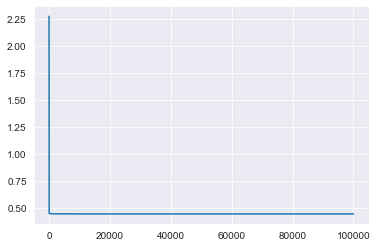

In [55]:
_ = plt.plot(mlp.losses)

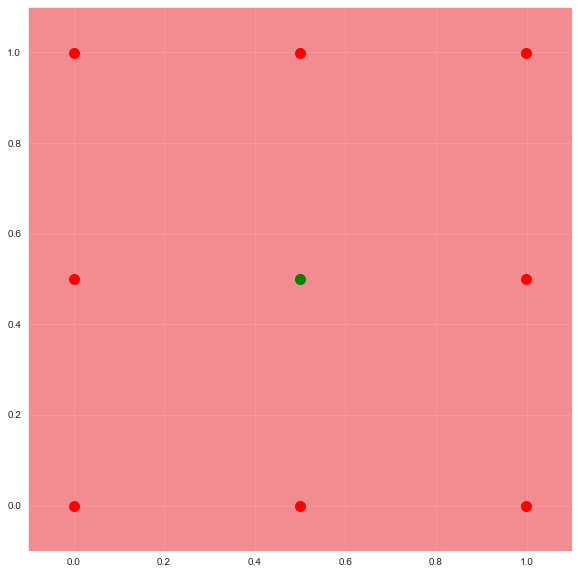

In [56]:
mlp.plot()

## the right situation is not solvable by only two hidden notes

# for question 3

In [57]:
train_data = np.array(
    [
        [0, 0, 0],
        [0, 1, 1],
        [1, 1, 1],
        [1, 0, 1],
        [0, 0, 1],
        [0, 1, 0]])

expected_output = np.array(
    [
        [1],
        [-1],
        [1],
        [-1],
        [1],
        [-1]])

inputLayerNeurons=2
hiddenLayerNeurons=1
outputLayerNeurons=1

num_epochs =  100000
lr = 0.1
mlp = MLP(train_data, expected_output, lr, num_epochs,inputLayerNeurons, hiddenLayerNeurons,outputLayerNeurons)
mlp.train()

Initial hidden weights: [0.29984186] [0.84187272]
Initial hidden biases: [0.42806665]
Initial output weights: [0.31413008]
Initial output biases: [0.52406946]


ValueError: shapes (6,3) and (2,1) not aligned: 3 (dim 1) != 2 (dim 0)

In [ ]:
## diagnose
sns.set_style('darkgrid')
plt.figure(figsize=(10, 10))

plt.axis('scaled')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

h= 0.01 # interval

colors = {
    0: "ro",
    1: "go"
}

# plotting the five datapoints
for i in range(len(train_data)):
    plt.plot([train_data[i][0]],
             [train_data[i][1]],
             colors[target[i][0]],
             markersize=10)

    # plot the contour
x_range = np.arange(-0.1, 1.1, h)
y_range = np.arange(-0.1, 1.1, h)

# creating a mesh to plot decision boundary
xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
Z = np.array([[mlp.classify([x, y]) for x in x_range] for y in y_range])

# using the contourf function to create the plot
plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)